# Project Overview
"""
# Stress Level Detection with XGBoost

This project analyzes the **Stress Level Dataset** from Kaggle to predict stress levels using an XGBoost model and visualizes the first 15 decision trees.

## Dataset
- **Source**: [Stress Level Dataset on Kaggle](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data)
- **Description**: Student stress data with features like Depression, Heartrate, Anxiety Level.
- **License**: CC BY-SA 4.0
"""

# 1 - Imports and Setup

In [5]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import warnings
from graphviz import *
warnings.filterwarnings('ignore')

# 1: Load Data and Train Model

In [17]:
data=pd.read_csv('../data/StressLevelDataset.csv')
print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
# Locating the target column
X=data.iloc[:,:20]
Y=data.iloc[:,20].values
# Over sampling the loaded Data
ros=RandomOverSampler(random_state=42)
x_resampled,y_resampled= ros.fit_resample(X,Y)
# Under sampling the loaded Data
rus = RandomUnderSampler(random_state=42)
x_rus_resampled, y_rus_resampled = rus.fit_resample(X, Y)

Dataset shape: (1100, 21)
Columns: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


# 2: Splitting the test and train set

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train_resam,x_test_res,y_train_resam,y_test_res=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=0)
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus_resampled,y_rus_resampled,test_size=0.2,random_state=0)

# 3: Plotting the y_train

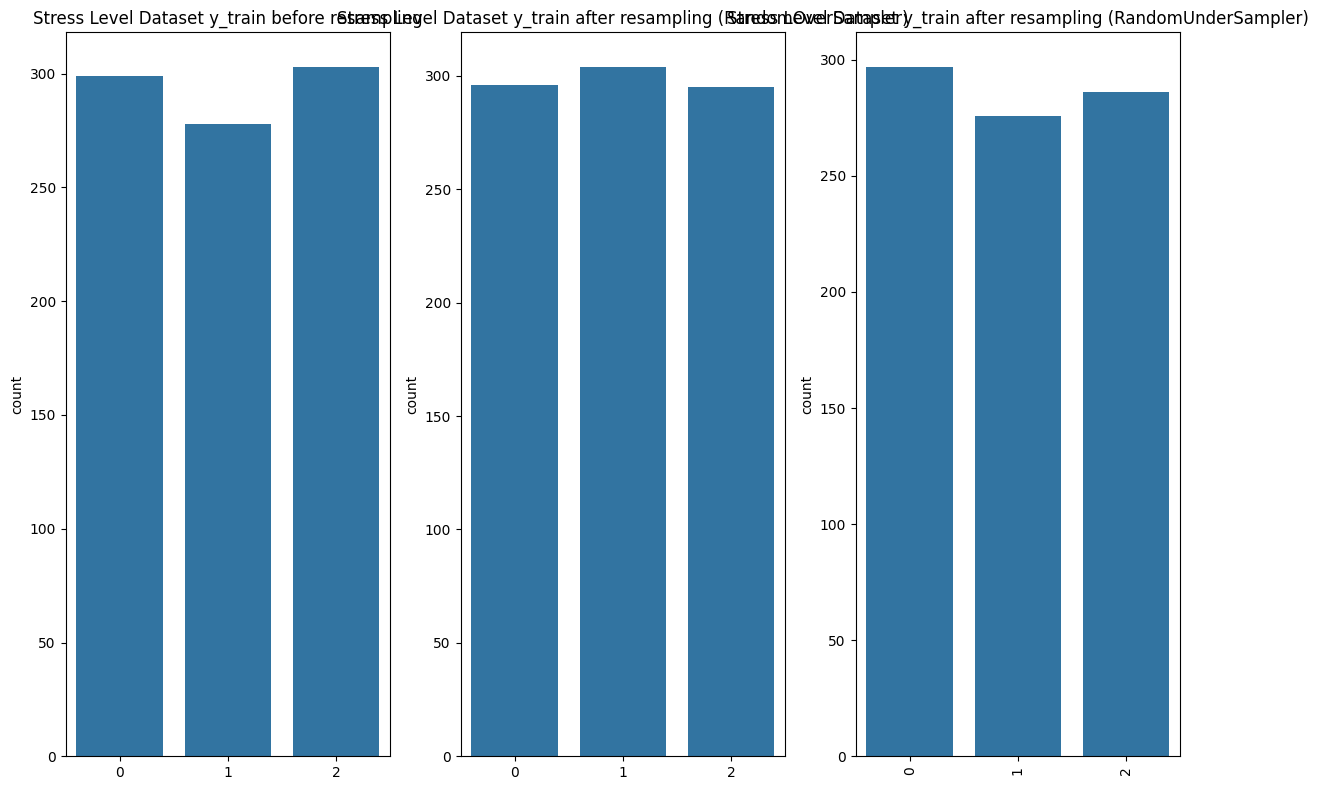

In [16]:
fig,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(12,8))
sns.countplot(x=y_train,ax=ax1)
ax1.set_title('Stress Level Dataset y_train before resampling')
plt.xticks(rotation=90)
ax2.set_title('Stress Level Dataset y_train after resampling (RandomOverSampler)')
sns.countplot(x=y_train_resam,ax=ax2)
ax3.set_title('Stress Level Dataset y_train after resampling (RandomUnderSampler)')
sns.countplot(x=y_train_rus,ax=ax3)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [8]:
xgb_train = xgb.DMatrix(x_train,y_train)
xgb_test = xgb.DMatrix(x_test,y_test)
#resampled
xgb_train_resam = xgb.DMatrix(x_train_resam,y_train_resam)
xgb_test_resam = xgb.DMatrix(x_test_res,y_test_res)
#unersampled
xgb_rus_train=xgb.DMatrix(x_train_rus,y_train_rus)
xgb_rus_test=xgb.DMatrix(x_test_rus,y_test_rus)

# 4: Training the models

In [9]:
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0.1,
    'nthread': -1,
    'seed': 42
}
n=50
model=xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)
model_resampled=xgb.train(params=params,dtrain=xgb_train_resam,num_boost_round=n)
model_rus=xgb.train(params=params,dtrain=xgb_rus_train,num_boost_round=n)

# 5: Making predictions

In [10]:
preds=model.predict(xgb_test)
preds=np.round(preds)
accuracy=accuracy_score(y_test,preds)
print('Accuracy before resampling:',accuracy*100,'%')
preds_res=model_resampled.predict(xgb_test_resam)
preds_res=np.round(preds_res)
accuracy_res=accuracy_score(y_test_res,preds_res)
print('Accuracy after resampling (Oversampling) :',accuracy_res*100,'%')
preds_rus=model_rus.predict(xgb_rus_test)
preds_rus=np.round(preds_rus)
accuracy_res=accuracy_score(y_test_rus,preds_rus)
print('Accuracy after resampling (Undesampling) :',accuracy_res*100,'%')

Accuracy before resampling: 89.0909090909091 %
Accuracy after resampling (Oversampling) : 87.94642857142857 %
Accuracy after resampling (Undesampling) : 88.83720930232558 %


# 6: Feature importance score

In [11]:
print(model.get_score(importance_type='gain'))

{'anxiety_level': 3.02520489692688, 'self_esteem': 2.018108606338501, 'mental_health_history': 0.940395176410675, 'depression': 1.7887566089630127, 'headache': 3.1901602745056152, 'blood_pressure': 21.643455505371094, 'sleep_quality': 19.24712371826172, 'breathing_problem': 1.0645145177841187, 'noise_level': 2.0046167373657227, 'living_conditions': 0.8830093741416931, 'safety': 9.705025672912598, 'basic_needs': 7.514557838439941, 'academic_performance': 2.7136728763580322, 'study_load': 1.5867847204208374, 'teacher_student_relationship': 1.7846425771713257, 'future_career_concerns': 5.1956257820129395, 'social_support': 6.580856800079346, 'peer_pressure': 1.0652036666870117, 'extracurricular_activities': 3.6474645137786865, 'bullying': 2.7906627655029297}


# 7: Extracting some of the xgboost tree results

In [12]:
output_dir = '../stress level output/trees eg'
os.makedirs(output_dir, exist_ok=True)
for i in range(15):
    xgb.plot_tree(model,num_trees=i)
    print(f'saving tree {i+1}.png')
    plt.savefig(f'{output_dir}/tree{i+1}.png',dpi=300,bbox_inches='tight')
    plt.close()

saving tree 1.png
saving tree 2.png
saving tree 3.png
saving tree 4.png
saving tree 5.png
saving tree 6.png
saving tree 7.png
saving tree 8.png
saving tree 9.png
saving tree 10.png
saving tree 11.png
saving tree 12.png
saving tree 13.png
saving tree 14.png
saving tree 15.png


# 8: Plotting the importance

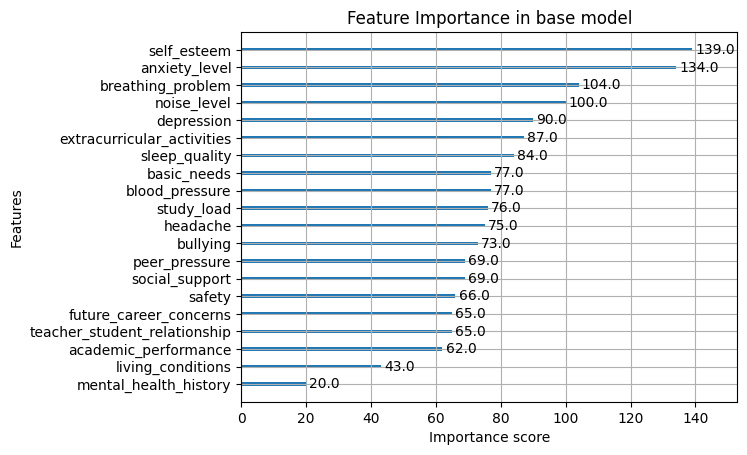

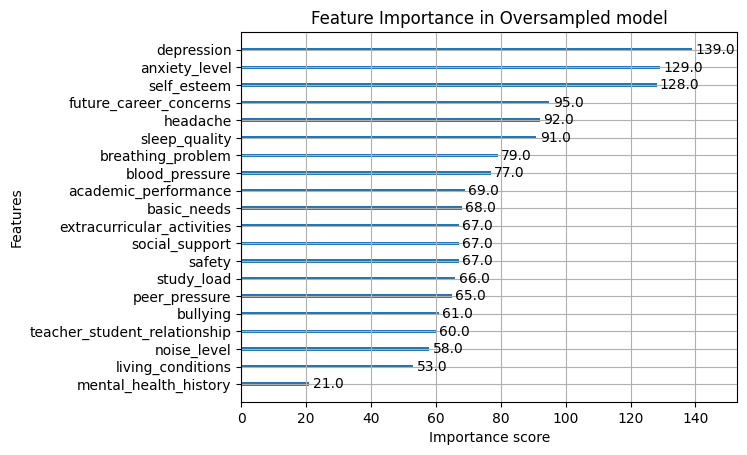

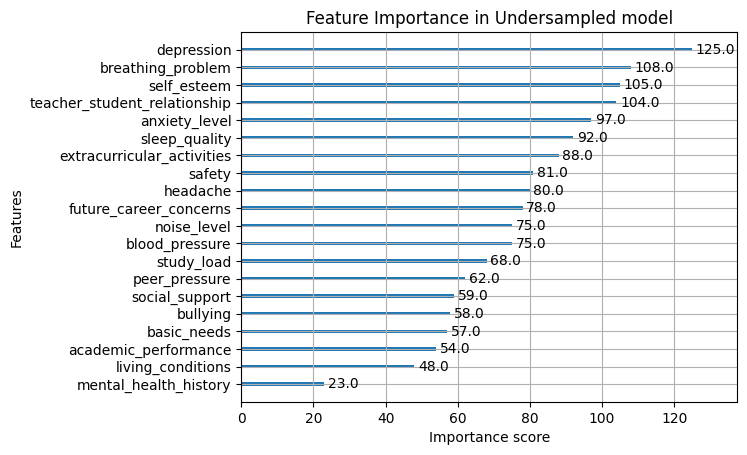

In [13]:
output_dir= '../stress level output/features importance'
os.makedirs(output_dir, exist_ok=True)
models=[(model,'base'),(model_resampled,'Oversampled'),(model_rus,'Undersampled')]
for model,name in models:
    xgb.plot_importance(model,title= f'Feature Importance in {name} model')
    plt.savefig(f'{output_dir}/importance {name}.png',dpi=300,bbox_inches='tight')